# Random Variables and Their Distributions

Random variable (RV) can take only numerical values, and it represents (covers) the set of all possible elementary outcomes in a set $\Omega$. RV can be discrete or continuous. For example, events such as coin tosses, dice throws and card games are events that can be represented using discrete random variables, while values of body heat, atmospheric pressure and student grade point averages (GPA) represents continuous random variables.

By representing events using random variables one can simplify statisical analysis of data - isolate and focus only on certain characteristics of interest.

In scipy.stats library there are many functions which can be used for simple manipulation with stadard distributions.

# Discrete distributions

## Bernoulli distribution

The Bernoulli distribution is a probability distribution for a single random experiment or trial that has only two possible outcomes: success (usually denoted as 1) and failure (usually denoted as 0). It models the probability of success in a single trial. The Bernoulli distribution has a single parameter, which is the probability of success ($p$). The distribution is characterized by this probability. The probability mass function (PMF) of a Bernoulli distribution is simple and expresses the probability of success (1) or failure (0) in a single trial. It is typically written as $P(X = 1) = p$ and $P(X = 0) = 1 - p$, where $X$ is a random variable representing the outcome.

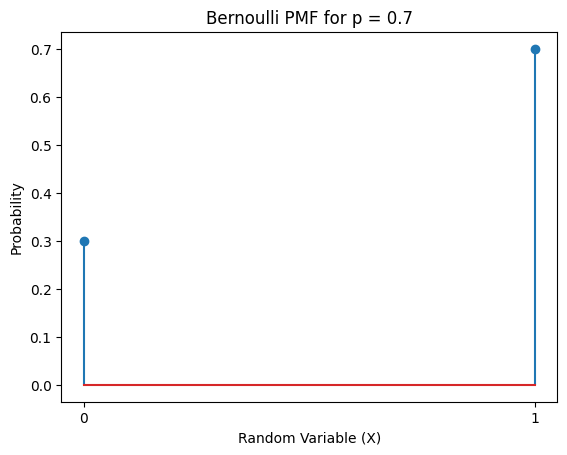

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the probability of success
p = 0.7  # Probability of success (e.g., getting a 'heads' on a coin toss)

# (0 - failure and 1 - success)
k = [0, 1]

# Calculate the PMF for the specified values
pmf = stats.bernoulli.pmf(k, p)

# Create a plot to visualize the PMF
plt.stem(k, pmf)
plt.xticks(k)
plt.xlabel("Random Variable (X)")
plt.ylabel("Probability")
plt.title(f"Bernoulli PMF for p = {p}")
plt.show()


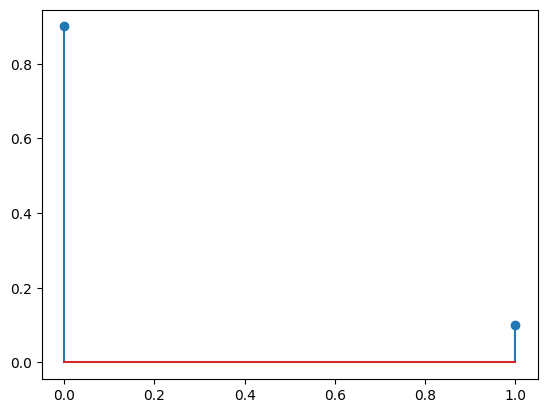

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

def plot_Bernoulli_pmf(p):

    k = np.arange(0, 2)
    P_B = stats.bernoulli.pmf(k, p)
    # or simly:
    #P_B=np.array([1-p, p])
    plt.stem(k, P_B, '-o')
    plt.show()

plot_Bernoulli_pmf(0.1)

## Binomial distribution




The Binomial distribution is used to model the number of successes ($k$) in a fixed number of independent and identically distributed Bernoulli trials ($n$ trials). In other words, it deals with multiple Bernoulli trials and counts the total number of successes. The Binomial distribution has two parameters: the probability of success in a single trial ($p$) and the number of trials ($n$). The distribution is characterized by these two parameters. The PMF of a Binomial distribution calculates the probability of obtaining exactly $k$ successes in $n$ trials. It is given by the formula $P(X = k) = C(n, k) \cdot p^k \cdot (1 - p)^{(n - k)}$, where $C(n, k)$ is the binomial coefficient, $p$ is the probability of success, and k is the number of successes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import ipywidgets as widgets


def plot_pmf(n, p):
    '''
    Plot of binomial PMF, Binom(n, p)
    '''
    k = np.arange(0, n+1)
    P_binom = stats.binom.pmf(k, n, p)
    plt.stem(k, P_binom)

    plt.xlabel('Number of successes - k')
    plt.ylabel('Probability of k suceesses')
    plt.show()

widgets.interact(
    plot_pmf,
    n=widgets.IntSlider(min=0, max=100, step=1, value=15),
    p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))


interactive(children=(IntSlider(value=15, description='n'), FloatSlider(value=0.5, description='p', max=1.0, s…

<function __main__.plot_pmf(n, p)>

We roll the dice eight times. What is the probability that a six comes up exactly 3 times?

In [5]:
import numpy as np
from scipy import stats

# Define the parameters for the binomial distribution
n = 8  # Number of trials (rolling the die 8 times)
p = 1/6  # Probability of success (rolling a six)

# Calculate the probability of rolling a six exactly 3 times
k = 3  # Number of successful outcomes
probability = stats.binom.pmf(k, n, p)

print(f"The probability of rolling a six exactly 3 times in 8 rolls is approximately {probability:.4f}")


The probability of rolling a six exactly 3 times in 8 rolls is approximately 0.1042


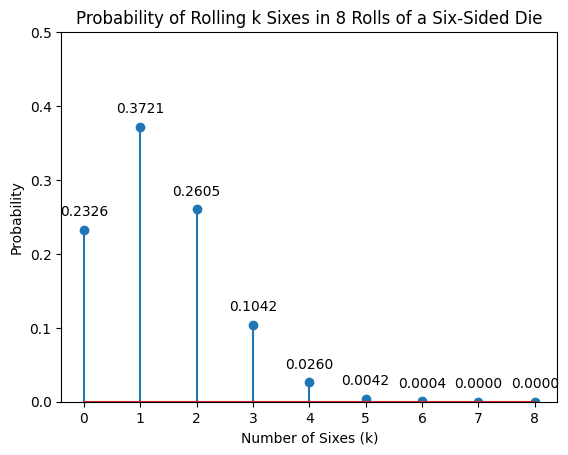

In [6]:
# Define the parameters for the binomial distribution
n = 8  # Number of trials (rolling the die 8 times)
p = 1/6  # Probability of success (rolling a six)

# Calculate the probability of rolling a six exactly 0, 1, 2 ... n times
k = np.arange(n+1)
probability = stats.binom.pmf(k, n, p)

# Create a stem plot
plt.stem(k, probability)

# Label the stem lines with probabilities
for k, prob in zip(k, probability):
    plt.annotate(f"{prob:.4f}", (k, prob), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Number of Sixes (k)')
plt.ylabel('Probability')
plt.title('Probability of Rolling k Sixes in 8 Rolls of a Six-Sided Die')
plt.ylim(0,0.5)
plt.show()

In [7]:
  sum(probability)

1.0000000000000002

Each value of "k" corresponds to a specific number of successful outcomes. If $k = 0$, it means we are considering the scenario where there are no successful outcomes in those trials. In the above example $k = 0$ means we're interested in the probability of not rolling a single six in those 8 rolls. In other words, we want to find the probability of having 0 successful outcomes (rolling a six) in the 8 trials. "What's the chance of not rolling a six at all in 8 rolls of the die?" or "What's the probability of getting all non-six outcomes?". It's important to note that the sum of probabilities for all values of "k" (from 0 to n) should add up to 1 because these probabilities cover all possible outcomes of the binomial experiment.

## Poisson distribution


The Poisson distribution is a probability distribution that describes the number of events that occur in a fixed interval of time or space. It is often used to model rare events where the average rate of occurrence is known, but the exact timing or number of events is uncertain.

Key characteristics of the Poisson distribution:

1. **Parameter Lambda (λ)**: The Poisson distribution has one parameter, λ (lambda), which represents the average rate of events occurring in the specified interval. Lambda is a positive real number. It describes the expected or average number of events in the interval.

2. **Random Variable (X)**: The random variable X in the Poisson distribution represents the number of events that actually occur in the given interval. X can take on non-negative integer values (0, 1, 2, 3, ...) and is often used to model counts of events.

3. **Probability Mass Function (PMF)**: The PMF of the Poisson distribution gives the probability of observing a specific number of events (k) in the interval. It is defined as:
   
   $P(X = k) = (e^{(-λ)} \cdot λ^k) / k!$, where "e" is the base of the natural logarithm (approximately 2.71828).

4. **Memoryless Property**: The Poisson distribution has a memoryless property, which means that the probability of an event occurring in a small subinterval of the given interval is independent of the number of events that have already occurred.

Common applications of the Poisson distribution include modeling:

- The number of phone calls at a call center in a given hour.
- The number of accidents at a traffic intersection in a day.
- The number of emails received per hour.


The Poisson distribution is particularly useful in situations where events are rare but random, and where the average rate of occurrence is known. It provides a way to estimate the probability of observing a specific number of events in a given interval, given the average rate of occurrence.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import ipywidgets as widgets


def f(n, lam):
    k = np.arange(0, n+1) # Define a range of possible outcomes (k values). n is the maximum number of possible outcomes
    P_poisson = poisson.pmf(k, lam) # Calculate the PMF for the Poisson distribution

    plt.stem(k, P_poisson, '-o')
    plt.title(f'Poisson PMF (λ={lam})')
    plt.xlabel('Number of events')
    plt.ylabel('Probability of the number of events (k)')
    plt.show()

widgets.interact(f,
                 n=widgets.IntSlider(min=0, max=50, step=1, value=25),
                 lam=widgets.FloatSlider(min=0, max=30, step=1, value=5))

interactive(children=(IntSlider(value=25, description='n', max=50), FloatSlider(value=5.0, description='lam', …

<function __main__.f(n, lam)>

The λ parameter represents the average rate of event occurrences in the specified interval. It describes how frequently you expect events to happen on average. A higher λ implies a higher average rate of events.
The shape of the Poisson distribution depends on the value of λ. When λ is small, the distribution is skewed to the right, indicating a low probability of observing a high number of events. When λ is large, the distribution is more symmetric and concentrated around the mean.

What is the probability of receiving 5 calls in the next 15 minutes given an average rate of 4 calls per 15 minutes (λ = 4)?

In [9]:
from scipy.stats import poisson

# Define the parameters
lambda_value = 4  # Average rate of calls in 15 minutes
k = 5  # The number of calls we want to calculate the probability for

# Calculate the probability using the Poisson PMF
probability = poisson.pmf(k, lambda_value)

print(f"The probability of receiving 5 calls in the next 15 minutes is {probability:.4f}")


The probability of receiving 5 calls in the next 15 minutes is 0.1563


In [ ]:
from math import factorial
np.exp(-lambda_value)*lambda_value**k/factorial(k)

0.15629345185053165

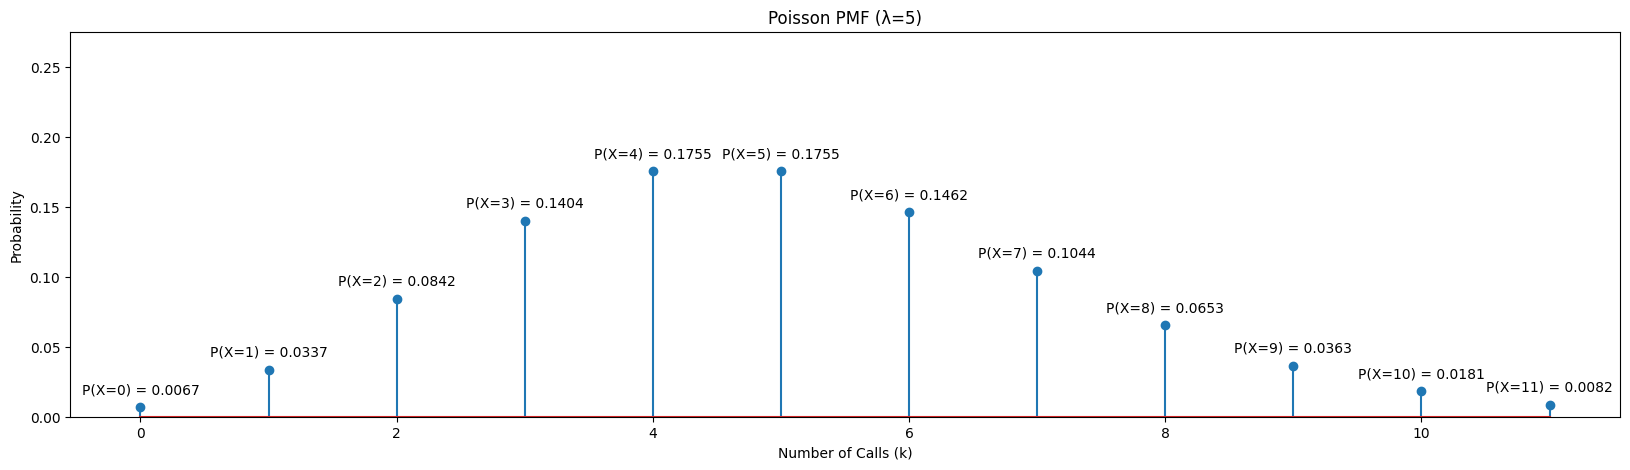

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the parameter lambda (average rate of calls)
lambda_value = 5  # Average rate of calls in 15 minutes

# Define a range of possible values for k
k_values = list(range(11+1))  # Values from 0 to 10

# Calculate the PMF for the Poisson distribution for each k
probabilities = poisson.pmf(k_values, lambda_value)

# Create a stem plot with annotations
plt.figure(figsize=(20,5))
plt.stem(k_values, probabilities)
plt.xlabel('Number of Calls (k)')
plt.ylabel('Probability')
plt.title(f'Poisson PMF (λ={lambda_value})')

# Annotate each point with its probability
for k, prob in zip(k_values, probabilities):
    plt.annotate(f'P(X={k}) = {prob:.4f}', (k, prob), textcoords="offset points", xytext=(0, 10), ha='center')
plt.ylim(0,max(probabilities)+0.1)
plt.show()


## Geometric distribution

The geometric distribution is a probability distribution that models the number of trials required for a Bernoulli (binary) experiment to achieve its **first** success. In a Bernoulli experiment, there are two possible outcomes: success (usually denoted as "1") and failure (usually denoted as "0"). The geometric distribution describes the number of trials needed to achieve the first success, where each trial is independent and has the same probability of success ($p$).

Key characteristics of the geometric distribution:

1. **Probability of Success ($p$)**: The probability of success in a single trial. In other words, the probability that the event of interest occurs on any given trial. The probability of failure is then ($1 - p$).

2. **Random Variable (X)**: The random variable $X$ in the geometric distribution represents the number of trials needed to achieve the first success. It can take on values 1, 2, 3, and so on.

3. **Probability Mass Function (PMF)**: The PMF of the geometric distribution calculates the probability of achieving the first success on the $k$-th trial. It is given by:
   
   $P(X = k) = (1 - p)^{(k-1)} \cdot p$ for $k = 1, 2, 3, ...$

4. **Memorylessness**: The geometric distribution has a memoryless property, which means that the probability of achieving the first success on the $k$-th trial is independent of the number of previous trials. In other words, the past does not affect the future in a memoryless distribution.

5. **Applications**: The geometric distribution is used to model situations where you are interested in the number of trials required for a specific event to occur, such as the number of coin flips needed to get heads for the first time.

6. **Mean and Variance**: The mean (expected value) of the geometric distribution is 1/p, and the variance is $(1-p) / p^2$.

The geometric distribution is often used in scenarios where events are rare, and you want to understand the waiting time or number of trials needed to achieve a particular outcome. It's particularly useful for modeling processes where the probability of success remains constant and independent from trial to trial.

The following code defines a Python function to create an interactive visualization of the Probability Mass Function (PMF) and Cumulative Distribution Function (CDF) for a geometric distribution

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
import ipywidgets as widgets



def f(p, n_max):
    x = np.arange(1, n_max + 1)

    # direct application fo the equation:
    y = [((1 - p)**(z - 1)) * p for z in x]
    z = [(1 - (1 - p)**zz) for zz in x]

    #or uding stats.geom
    # geom.pmf(x, p)
    #y=geom.pmf(x, p)
    #z=geom.cdf(x, p)

    plt.plot(x, y, 'o-', label='PMF')
    plt.plot(x, z, 'ro-', label='CDF')
    plt.legend()
    plt.show()


widgets.interact(
    f,
    p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
    n_max=widgets.IntSlider(min=2, max=1000, step=1, value=10))

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), IntSlider(value=10, descrip…

<function __main__.f(p, n_max)>

The PMF calculates the probability of achieving the first success on the k-th trial, given the probability of success "p." As you change the "p" and "n_max" sliders, the blue curve shows how the PMF changes for different success probabilities and numbers of trials.
The x-axis represents the number of trials (k), and the y-axis represents the probability.

The red curve represents the CDF of the geometric distribution. The CDF calculates the probability of achieving the first success within k or fewer trials, given the probability of success "p."
As you change the "p" and "n_max" sliders, the red curve shows how the CDF changes for different success probabilities and numbers of trials.
The x-axis represents the number of trials (k), and the y-axis represents the cumulative probability.

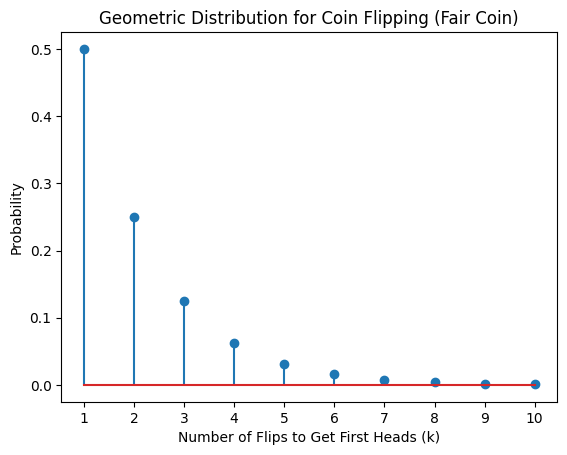

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Probability of success (getting heads in a single coin flip)
p = 0.5

# Create a range of possible values for the number of flips needed (k)
k_values = np.arange(1, 11)  # Consider up to 10 flips

# Calculate the PMF (Probability Mass Function) for each value of k
pmf_values = geom.pmf(k_values, p)

# Plot the PMF
plt.stem(k_values, pmf_values)
plt.xlabel('Number of Flips to Get First Heads (k)')
plt.ylabel('Probability')
plt.title('Geometric Distribution for Coin Flipping (Fair Coin)')
plt.xticks(k_values)
plt.show()


When k is 1 (the first flip), the probability of getting heads is 0.5 (50%) because it's equally likely to be heads or tails on the first flip.
However, as k increases, the probability of getting heads on the k-th flip decreases because it becomes less likely to get heads after a sequence of consecutive tails.

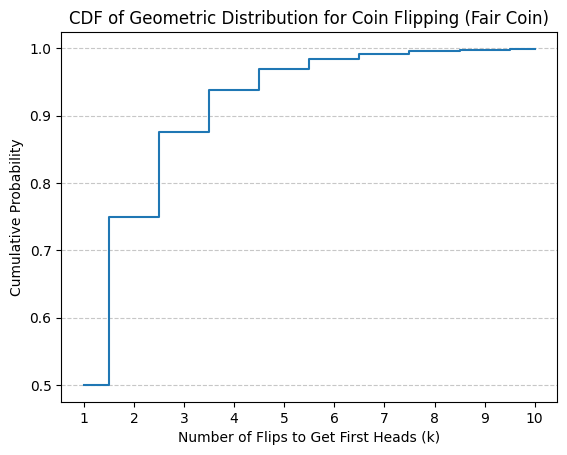

In [13]:
# Calculate the CDF (Cumulative Distribution Function) for each value of k
cdf_values = geom.cdf(k_values, p)

# Plot the CDF
plt.step(k_values, cdf_values, where='mid')
plt.xlabel('Number of Flips to Get First Heads (k)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Geometric Distribution for Coin Flipping (Fair Coin)')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Uniform Distribution

In a discrete uniform distribution, each possible outcome has an equal probability of occurrence.
Example: Consider rolling a fair six-sided die. The numbers 1, 2, 3, 4, 5, and 6 are the possible outcomes, and each has a probability of $\dfrac{1}{6}$ of being rolled.

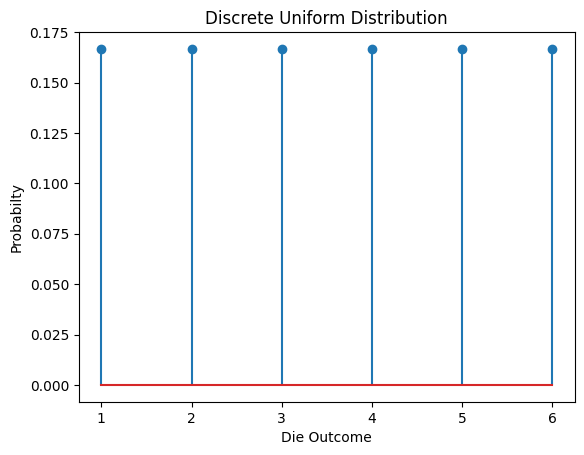

In [14]:
import random
import matplotlib.pyplot as plt

# Define the possible outcomes of a six-sided die
outcomes = [1, 2, 3, 4, 5, 6]

probabilty = [1/len(outcomes)] * 6

# Plot the histogram
plt.stem(outcomes, probabilty)
plt.xlabel('Die Outcome')
plt.ylabel('Probabilty')
plt.title(f'Discrete Uniform Distribution')
plt.xticks(outcomes)
plt.show()

# Continuous Probability Distributions
## Uniform Distribution

In a continuous uniform distribution over an interval, the probability density function (PDF) remains constant within that interval, resulting in a constant probability for any subinterval of the specified range.

Example: Imagine selecting a random point on a line segment of length 10 units. If the distribution is continuous and uniform, any subinterval of, say, 2 units within that 10-unit segment has the same probability of containing the selected point.




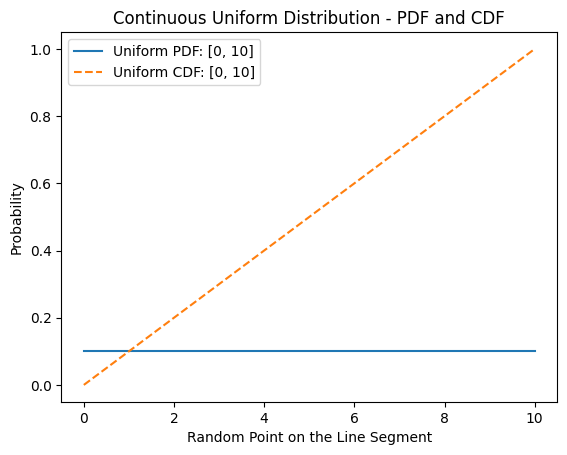

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Parameters for the uniform distribution
a = 0  # Start of the interval
b = 10  # End of the interval

# Create an array of x values within the specified interval
x_values = np.linspace(a, b, 1000)

# Calculate the PDF for each x value
pdf_values = uniform.pdf(x_values, loc=a, scale=b-a)
# or: pdf_values = np.full_like(x_values, 1/(b-a))

# Calculate the CDF for each x value
cdf_values = uniform.cdf(x_values, loc=a, scale=b-a)

# Plot the PDF
plt.plot(x_values, pdf_values, label=f'Uniform PDF: [{a}, {b}]')
plt.plot(x_values, cdf_values, label=f'Uniform CDF: [{a}, {b}]', linestyle='--')
plt.xlabel('Random Point on the Line Segment')
plt.ylabel('Probability')
plt.title('Continuous Uniform Distribution - PDF and CDF')
plt.legend()
plt.show()

PDF describes the probability of specific values for a continuous random variable, while the CDF provides the cumulative probability up to a given point.

### Probability Density Function (PDF)
This code below plots the Probability density function (PDF) of $U[a,b]$, the uniform distribution over the interval $[a,b]$.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import uniform

def f(s):

    a = s[0]
    b = s[1]
    x = np.linspace(a,b,20)

    if b != a:
        #pdf by equation
        #y = np.array([1/(b-a)]*20)

        # using uniform.pdf(x,loc=a,scale=b-a)
        y=uniform.pdf(x,loc=a,scale=b-a)

        #CDF:
        x_cdf = np.linspace(0, 10, 1001)
        cdf = uniform.cdf(x_cdf, loc=a, scale=b-a)

        plt.plot(x, y)
        plt.plot([a, a], [0, 1/(b-a)], 'g--', linewidth = 2.0)
        plt.plot([b, b], [0, 1/(b-a)], 'g--', linewidth = 2.0)
        plt.plot(x_cdf, cdf, 'r')
        plt.show()

widgets.interact(f, s = widgets.FloatRangeSlider(
    description = "[a, b]",
    value=[4, 6],
    min=0,
    max=10,
    step=0.01,
    continuous_update = False))

interactive(children=(FloatRangeSlider(value=(4.0, 6.0), continuous_update=False, description='[a, b]', max=10…

<function __main__.f(s)>

# Exponential Distribution

The exponential distribution is a continuous probability distribution (it is the continuous analogue of the geometric distribution), that models the time between events in a process where events occur continuously and independently at a constant average rate. It has a single parameter, often denoted as \( $\lambda$) (lambda), which represents the rate of events.

The probability density function (PDF) of the exponential distribution is given by:

$f(x) = \lambda e^{-\lambda x} $

Where:
- ($x$) is the random variable representing the time between events,
- ( $\lambda$ ) is the rate parameter.

The cumulative distribution function (CDF) is given by:

$F(x) = 1 - e^{-\lambda x}$

Key properties of the exponential distribution:

1. **Memoryless Property:** The exponential distribution is memoryless, meaning that the probability of an event occurring in the next instant is independent of the past. Mathematically, for any positive ($s$) and ($t$), the following holds:

 $P(X > s + t | X > s) = P(X > t)$


- $P(X > s + t | X > s)$: represents the conditional probability that the time until the next event occurs is greater than $(s + t)$, given that the current time is already $(s)$. In other words, it's the probability that you have to wait more than $(t)$ additional time units for the next event, given that you've already waited $(s)$ time units.

- $P(X > t)$: This is the unconditional probability that the time until the next event occurs is greater than $(t)$. It doesn't depend on any previous waiting time; it's just the probability of waiting more than $(t)$ time units for the next event.

The memoryless property states that these two probabilities are equal, meaning that the past history of waiting time doesn't affect the future waiting time beyond the initial $(s)$ units of time. In mathematical terms:


2. **Mean and Variance:**
   - The mean (expected value) of the exponential distribution is ($\frac{1}{\lambda}$).
   - The variance is $( \frac{1}{\lambda^2})$.

The exponential distribution is commonly used in various fields, such as reliability engineering, queuing theory, and survival analysis, to model the time until an event occurs in a continuous and memoryless process.

The code below plots the PDF and the CDF of the exponential distribution with parametere $\lambda$.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import expon

def f(lam, x_max, y_max):
    x = np.arange(0, x_max, x_max/1000)
    # using equation:
    #y = lam*np.exp(-lam*x)
    #z = 1 - np.exp(-lam*x)

    #using expon.pdf(x, scale=1/lam)
    y=expon.pdf(x, scale=1/lam)
    z=expon.cdf(x, scale=1/lam)

    plt.plot(x, y, linewidth = 3.0, label = 'PDF')
    plt.plot(x, z, 'r', linewidth = 3.0, label = 'CDF')

    plt.show()
widgets.interact(f, lam=widgets.FloatSlider(description = 'lambda',
                                            min=0, max=10, step=0.5, value=0.5),
                 x_max=widgets.FloatSlider(description = 'x_max',
                                           min=1, max=1000, step=1, value=10),
                 y_max=widgets.FloatSlider(description = 'y_max', min=0.1, max=10, step=1, value=1))

interactive(children=(FloatSlider(value=0.5, description='lambda', max=10.0, step=0.5), FloatSlider(value=10.0…

<function __main__.f(lam, x_max, y_max)>

Geometric distribution models the number of independent Bernoulli trials needed before a success occurs.

Exponential Distribution models the time between independent and identically distributed events occurring at a constant rate.

## Normal (Gaussian) Distribution

A Gaussian distribution, also known as a normal distribution, is a continuous probability distribution that is symmetric and bell-shaped.

Normal distributions are vary important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

The normal distribution is useful because of the central limit theorem. In its most general form, under some conditions (which include finite variance), it states that averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal, that is, they become normally distributed when the number of observations is sufficiently large.

Physical quantities that are expected to be the sum of many independent processes (such as measurement errors) often have distributions that are nearly normal.


The PDF of a Gaussian distribution with mean $(\mu)$ and standard deviation $(\sigma)$ is defined as:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Where:
- $x$ is the random variable.
- $\mu$ is the mean which determines the center of the distribution.
- $\sigma$ is the standard deviation (scale parameter) which determines the spread or width of the distribution.
- $\pi$ is the mathematical constant pi (approximately 3.14159).
- $e$ is the mathematical constant Euler's number (approximately 2.71828).

Key properties of the Gaussian distribution include:
- It is symmetric around the mean.
- The mean, median, and mode are all equal and located at the center of the distribution.


The Gaussian distribution is widely used in statistics and probability theory due to its mathematical tractability and because many natural phenomena exhibit a distribution that is approximately Gaussian. The Central Limit Theorem also states that the sum or average of a large number of independent and identically distributed random variables, regardless of their original distribution, tends to follow a Gaussian distribution.

Let us plot normal distribution $N(\mu,\sigma^2)$, depending on the mathematical expectation $\mu$ and variance $\sigma^2$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from scipy.stats import norm

e = np.e
pi = np.pi

def plot_normal(m, var):

    x = np.linspace(-10, 10, 1001)
    sig = var**0.5

    P_norm = norm.pdf(x, m, sig)

    plt.plot(x, P_norm, 'b', linewidth=3.0, label = "PDF")
    CDF_norm = norm.cdf(x, m, sig)
    plt.plot(x, CDF_norm, 'r', linewidth=3.0, label = "CDF")

    plt.show()

#a = np.linspace(0, 5, 1001)
#rng = e**a
widgets.interact(plot_normal, m=widgets.FloatSlider(description = 'm', min=-50, max=50, step=0.1, value=0, continuous_update = False),
                 var=widgets.FloatSlider(description = 'sigma^2', min=0.5, max=30, step=0.1, value=1, continuous_update = False))


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m', max=50.0, min=-50.0), F…

<function __main__.plot_normal(m, var)>

# Approximation of empirical PDF (normalized histogram) with continuous distributions

If we want to mathematicaly approximate distribution of some data, in general we need to specify the values at infinite number of points. This is not practical; hence approximation is performed from a certain family of distributions. Very often this family is taken to be a mixture of Gaussian distributions.

We will use data about temperature in city Detroit, and try to model the distirbution of temepratures using Gaussian mixture model.

### Plotting histogram of temepratures in city Detroitu (using e.g. 100 bins)

In [ ]:
import pandas as pd
df = pd.read_csv("temperature.csv")
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [ ]:
import pandas as pd

feature = ['Detroit']
df = pd.read_csv("temperature.csv",usecols=feature)
df.head()

,Detroit
0,NaN
1,284.030000
2,284.069789
3,284.173965
4,284.278140


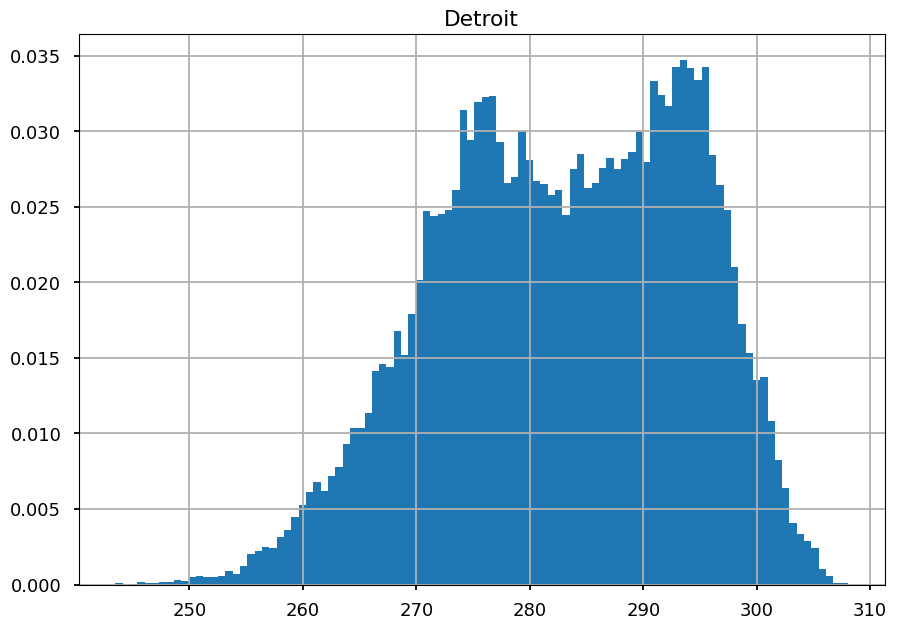

In [ ]:
hist = df.hist(density=True,bins=100)
plt.show()

#### Visual approximation:
We will try to approximate the histogram curve using:
1. Gaussian distribution: Norm(m=283K, sigma=11K),
2. Gaussian mixture: $0.5\cdot$ Norm(m=276K, sigma=6K)+$0.5\cdot$Norm(m=293K, sigma=6.5K),
3. Gaussian mixture: $0.5\cdot$ Norm(m=276K, sigma=6.5K)+$0.5\cdot$Norm(m=293K, sigma=6K)

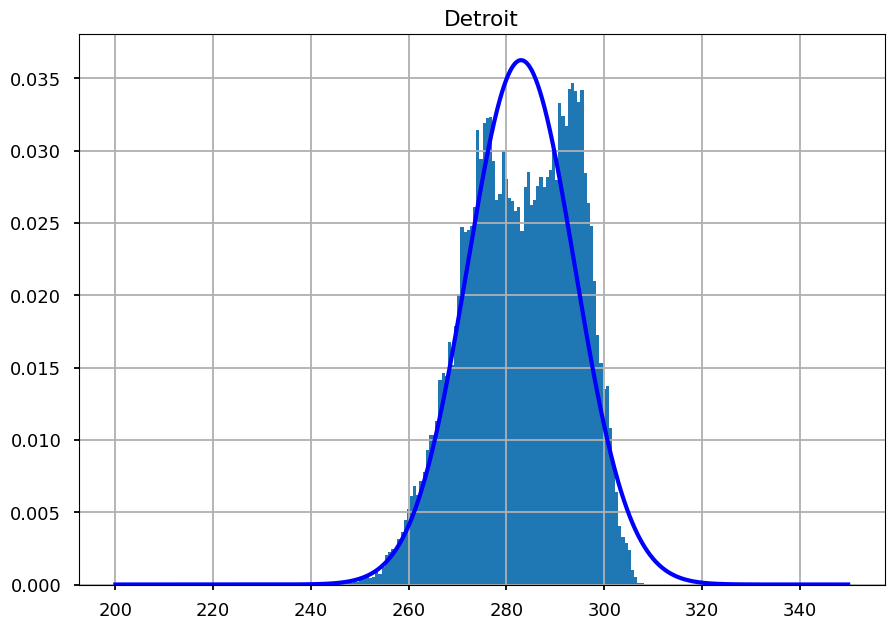

In [ ]:
from scipy.stats import norm

hist = df.hist(density=True,bins=100)

step=0.1
x = np.arange(200, 350, step)
m=283
sig=11
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm, 'b', linewidth=3.0)
plt.show()

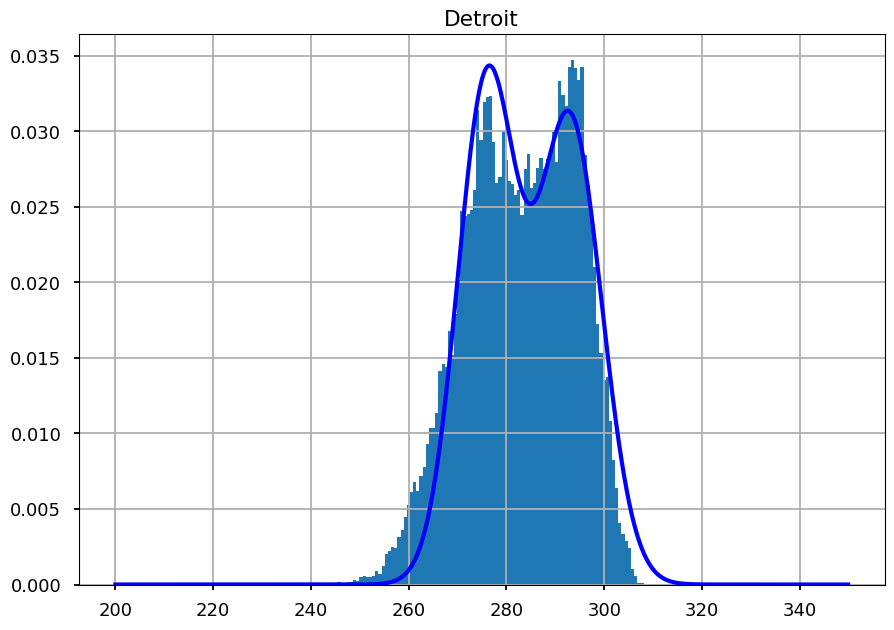

In [ ]:
hist = df.hist(density=True,bins=100)
x = np.arange(200, 350, step)
m1=276
sig1=6
m2=293
sig2=6.5

P_norm_mix1 = 0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2)

plt.plot(x, P_norm_mix1, 'b', linewidth=3.0)
plt.show()

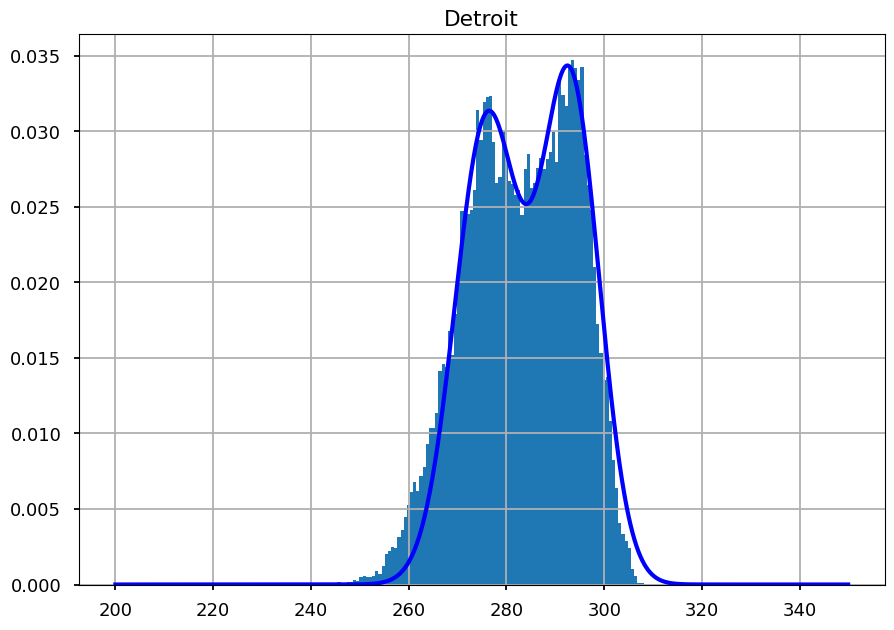

In [ ]:
hist = df.hist(density=True,bins=100)
x = np.arange(200, 350, step)
m1=276
sig1=6.5
m2=293
sig2=6

P_norm_mix2 = np.array(0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2))

plt.plot(x, P_norm_mix2, 'b', linewidth=3.0)
plt.show()

Using the approximation we can for example find probability that temperature is between 275 and 290:

In [ ]:
# Integrating by hand:

PP=np.array([step*z for x,z in zip(x,P_norm_mix2) if (x>275 and x<290)])
P=PP.sum(axis=0)
print(P)

0.42643144514808146


## Exercise

Find histograms of temperatures in other cities, and graphically find the best approximations using Gaussian mixtures.

## Exercise

Generate data $N$ data points (for $N=5,10,100,1000,10000,...$) from all the distributions we demonstrated above, plot the corresponding histograms, and compare them with the true PDF.